In [1]:
import subprocess as sp
print(sp.getoutput('which python3'))

# !python3 -m virtualenv IMAGE-REC
# !source IMAGE-REC/bin/activate

/opt/homebrew/bin/python3


In [2]:
%pip list
%pip install -r requirements.txt


Package                                           Version
------------------------------------------------- ------------
absl-py                                           1.2.0
aiml                                              0.9.2
aiohttp                                           3.8.1
aiosignal                                         1.2.0
appnope                                           0.1.3
argon2-cffi                                       21.3.0
argon2-cffi-bindings                              21.2.0
asgiref                                           3.5.2
astroid                                           2.9.3
asttokens                                         2.0.5
astunparse                                        1.6.3
async-generator                                   1.10
async-timeout                                     4.0.2
attrs                                             21.4.0
autopep8                                          1.6.0
backcall                             

In [3]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from imutils import contours

In [4]:
# from PIL import Image
# import glob
# import os

# # new folder path (may need to alter for Windows OS)
# # change path to your path
# path = '/Users/tareklein/Downloads/archive/train/plus cleaned' #the path where to save resized images
# # create new folder
# if not os.path.exists(path):
#     os.makedirs(path)

# # loop over existing images and resize
# # change path to your path
# for filename in glob.glob(path + '/*.jpg'): #path of raw images
#     img = Image.open(filename).resize((28,28))
#     # save resized images to new folder with existing filename
#     img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))

In [5]:
def normalize_img(image, label):
    return (tf.cast(image, tf.float32) / 255.0, label)

In [6]:

mnist_corrupted = 'mnist_corrupted'
mnist = 'mnist'

dataset = mnist

(train_dataset, test_dataset), ds_info = tfds.load(
    dataset,
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
    )
print(type(train_dataset))

# (train_dataset2, test_dataset2), ds_info = tfds.load(
#     mnist_corrupted,
#     split=['train', 'test'],
#     shuffle_files=True,
#     as_supervised=True,
#     with_info=True
#     )

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [7]:
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# Store dataset in cache
train_dataset = train_dataset.cache()
# Shuffle data
train_dataset = train_dataset.shuffle(len(train_dataset))
# Split up into a batch of 64
train_dataset = train_dataset.batch(64)
# Grab other stuff before it done dealing with current stuff
# Optimization 
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)


In [8]:
#test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# Split up into a batch of 64
test_dataset = test_dataset.batch(64)
# Store dataset in cache
test_dataset = test_dataset.cache()
# Grab other stuff before it done dealing with current stuff
# Optimization 
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [9]:
# Visualise image tensor 0 to 9
visualise = False
import matplotlib.pyplot as plt
if visualise:
    from tensorflow.keras.datasets import mnist
    x = 0
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(y_train.shape)
    print(y_train[0])
    print(X_train.shape)
    print(y_train)
    plt.imshow(X_train[0], cmap='Greys')
    plt.show()
    input()
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(len(train_dataset))
    #train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
    
    for (img, label) in train_dataset:
        

    

        if label.numpy() == x:
            print(img.numpy(), label.numpy())
            x+=1
            print('')
            print('---'*30)
            print('')
        if x == 10:
            break
    else:
        pass

In [10]:
train = True
epochs = 25
if train:
    model = tf.keras.models.Sequential([
        tf.keras.Input((28,28,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    history = model.fit(train_dataset, epochs=epochs, validation_data=(train_dataset))


    model.save('handwritten.model')
else:
    pass
#model.summary()

Epoch 1/25


2022-11-10 15:38:12.856318: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 2s 993us/step - loss: 0.4190 - accuracy: 0.8846 - val_loss: 0.2643 - val_accuracy: 0.9238
Epoch 2/25
938/938 [==============================] - 1s 920us/step - loss: 0.2319 - accuracy: 0.9327 - val_loss: 0.1946 - val_accuracy: 0.9444
Epoch 3/25
938/938 [==============================] - 1s 919us/step - loss: 0.1818 - accuracy: 0.9483 - val_loss: 0.1583 - val_accuracy: 0.9543
Epoch 4/25
938/938 [==============================] - 1s 920us/step - loss: 0.1525 - accuracy: 0.9559 - val_loss: 0.1303 - val_accuracy: 0.9623
Epoch 5/25
938/938 [==============================] - 1s 1ms/step - loss: 0.1304 - accuracy: 0.9624 - val_loss: 0.1114 - val_accuracy: 0.9681
Epoch 6/25
938/938 [==============================] - 1s 1ms/step - loss: 0.1159 - accuracy: 0.9658 - val_loss: 0.1013 - val_accuracy: 0.9708
Epoch 7/25
938/938 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9703 - val_loss: 0.0951 - val_accuracy: 0.9725
Epoch 8/2

INFO:tensorflow:Assets written to: handwritten.model/assets


In [11]:
model = tf.keras.models.load_model('handwritten.model')

loss, accuracy = model.evaluate(train_dataset)

print(loss)
print(accuracy)

938/938 [==============================] - 0s 389us/step - loss: 0.0317 - accuracy: 0.9909
0.03173714131116867
0.9908999800682068


In [12]:
# source: Elias Riise
def summarize_diagnostics(history, epochs):
    e = range(1, epochs+1)
    plt.subplot(121)
    plt.plot(e, history.history['loss'], color='blue', label='train')
    plt.plot(e, history.history['val_loss'], color='orange', label='test')
    plt.title('Loss function')
    plt.xlabel('Epoch')
    plt.legend()
    plt.subplot(122)
    plt.plot(e, history.history['accuracy'], color='blue', label='train')
    plt.plot(e, history.history['val_accuracy'], color='orange', label='test')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


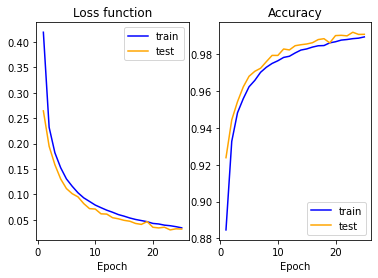

In [13]:
summarize_diagnostics(history, epochs)

In [14]:
def rescaleFrame(frame, scale):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[1] * scale)
    print(width, height)
    dimensions = (width, height)
    
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

In [15]:
def crop_shape(img, zoom=1, angle=0, coord=None):
    init_zoom = 170
    # Get the center of the image
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    # Get the rotation matrix
    rot_mat = cv.getRotationMatrix2D((cx,cy), angle, zoom)
    # Warp the image
    result = cv.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv.INTER_LINEAR)
    # Crop the image
    result = result[cy-init_zoom:cy+init_zoom, cx-init_zoom:cx+init_zoom]
    
    # Return the cropped image
    return result

In [16]:
def zoom_at(img, zoom=1, angle=0, coord=None):
    
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    
    rot_mat = cv.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv.INTER_LINEAR)
    
    return result

In [17]:
def calculate_zoom(window_name, height):
    
    _, _, _, thresh_window_h = cv.getWindowImageRect(window_name)
    ratio = (thresh_window_h-height)/125
    if ratio < 1:
        ratio = 1
    return ratio

In [18]:
def convert_28(name, copy_from, gray_range):
    _, window = cv.threshold(copy_from, gray_range[0], gray_range[1], cv.THRESH_BINARY)
    window = cv.resize(name, (28,28), interpolation=cv.INTER_AREA)
    window = window.astype("float32") / 255.0
    window = np.expand_dims(window, axis=-1)
    return window

In [19]:
def predict(window):
    prediction = model.predict(window.reshape(1,28,28))
    predargmax = np.argmax(prediction)
    return predargmax

In [20]:
def contour_x(contours):
    cent_moment = cv.moments(contours)
    try:
        answer = (int(cent_moment['m10']/cent_moment['m00']))
        return answer
    except ZeroDivisionError:
        pass

In [21]:
def create_window(thresh, idx, cnt):
        x,y,w,h = cv.boundingRect(cnt)
        centercoords = [round(x+(w/2)), round(y+(h/2))]
        gray_range = (150, 255)
        fill_color = (0,0,0)
        window_name = 'Win_Number: ' + str(idx)
        _, _, window_w, window_h = cv.getWindowImageRect('Black & White (gray threshold)')

        
        # Create window
        _, temp_window = cv.threshold(thresh, gray_range[0], gray_range[1], cv.THRESH_BINARY)
        
        border = 2
        # Top
        cv.rectangle(temp_window, (0, y-border), (window_w, 0), fill_color, -1)
        # Bottom
        cv.rectangle(temp_window, (0, y+h), (window_w, window_h), fill_color, -1)
        # Left
        cv.rectangle(temp_window, (x-border, 0), (0, window_h), fill_color, -1)
        # Right
        cv.rectangle(temp_window, (x+w+border, 0), (window_w, window_h), fill_color, -1)


        # Calculate zoom ratio
        zoom_ratio = calculate_zoom('Black & White (gray threshold)', h)
        
        # Crop the image to the number (zoom in) crashes program if zoom_ratio is too high (1.5) or too low (0.5)
        #temp_window = crop_shape(temp_window, zoom_ratio, 0, centercoords)
        temp_window = zoom_at(temp_window, zoom_ratio, 0, centercoords)
        
        # Convert window to 28x28 for prediction (data trained on 28x28)
        temp_28 = convert_28(temp_window, thresh, gray_range)
        # Predict
        predargmax = predict(temp_28)
        # Bounding Box
        # cv.rectangle(thresh, (x,y), (x+w, y+h), (255, 255, 0), 4)
        
        
        cv.putText(temp_window, 'Prediction: ' + str(predargmax), (20,40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        cv.putText(temp_window, 'Prediction: ' + str(predargmax), (20,40), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)

        cv.imshow(window_name, temp_window)
        #cv.moveWindow(window_name, cv.getWindowImageRect('Gray scale')[2]*(idx), cv.getWindowImageRect('Gray scale')[3])

                
        return predargmax

In [23]:
capture = cv.VideoCapture(0)
scale = 0.35
gray_range = (220, 255)
predictions = []
cleared = True
while True:
    isTrue, frame = capture.read()
    frame_resized = rescaleFrame(frame, scale)

    # Grayscaled
    gray = cv.cvtColor(frame_resized, cv.COLOR_BGR2GRAY)
    gray_28 = convert_28(gray, gray, gray_range)
    predargmax_gray_28 = predict(gray_28)

    # Black and white
    ret, thresh = cv.threshold(gray, gray_range[0], gray_range[1], cv.THRESH_BINARY)
    thresh_28 = convert_28(thresh, thresh, gray_range)
    predargmax_thresh_28 = predict(thresh_28)
      
      
    _, result = cv.threshold(gray, gray_range[0], gray_range[1], cv.THRESH_BINARY)
    cv.rectangle(result, (0, 0), (500,500), (255,255,255), -1)
    
      
    # cv.putText(gray, 'Gray: ' + str(predargmax_gray_28), (20,40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    # cv.putText(gray, 'Gray: ' + str(predargmax_gray_28), (20,40), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
    # cv.putText(gray, 'B&W: ' + str(predargmax_thresh_28), (20,80), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    # cv.putText(gray, 'B&W: ' + str(predargmax_thresh_28), (20,80), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
           
    #cv.rectangle(thresh, (gray.shape[0], gray.shape[1] ), (170, 170), (255,255,255), 2)
    
    cv.imshow('Gray scale', gray)
    cv.imshow('Black & White (gray threshold)', thresh)
    
    cv.moveWindow('Black & White (gray threshold)', cv.getWindowImageRect('Gray scale')[2], 0)
    
    
    number_contours, _ = cv.findContours(cv.morphologyEx(thresh, cv.MORPH_OPEN, np.ones((2,2))), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        
    if len(number_contours) > 0:
        try:
            sorted_contours = sorted(number_contours, key = contour_x, reverse = False)
        except TypeError as e:
            print('TypeError: ' + str(e))
        for idx, cnt in enumerate(sorted_contours):
            x,y,w,h = cv.boundingRect(cnt)
            # Filter out small contours (noise)
            if (h) > 50:
                # Filter out contours that are too wide
                if (h/w) > 1.2:
                    answer = create_window(thresh, idx, cnt)
                    if answer is not None:
                        predictions.append(answer)
                        for x in range(10):
                            window_name = 'Win_Number: ' + str(x)
                            try:
                                cv.moveWindow(window_name, cv.getWindowImageRect(window_name)[2]*(x), cv.getWindowImageRect('Gray scale')[3])
                            except cv.error:
                                pass
                else:
                    try:
                        sorted_contours.remove(cnt)
                    except ValueError as e:
                        print('Error: ' + str(e))
                    
            cleared = False
        for x in range(len(predictions)):
            placement = 50
            space = 50
            cv.putText(result, str(predictions[x]), (placement+(space*x),200), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 5)
            if x < len(predictions)-1:
                cv.putText(result, '+', (round(placement+(space*x)+(space/2)),200), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 3)
            if x == len(predictions)-1:
                cv.putText(result, '=', (round(placement+(space*x)+(space/2)),200), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 3)
                cv.putText(result, str(sum(predictions)), (placement+(space*(x+1)),200), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 5)
        predictions = []
    else:
        if not cleared:
            for x in range(300):
                window_name = 'Win_Number: ' + str(x)
                cv.destroyWindow(window_name)
            cleared = True
            
    cv.imshow('Maffs', result)
    cv.moveWindow('Maffs', cv.getWindowImageRect('Gray scale')[2]*2, 0)

    if cv.waitKey(20) & 0xFF==ord('q'):
        break
    
capture.release()
cv.waitKey(100)
cv.destroyAllWindows()
sp.getoutput('deactivate')
cv.waitKey(100)

448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 9ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 9ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 8ms/st

/var/folders/dx/dzk39xls5b5g1pdbz16yjm5c0000gn/T/ipykernel_93538/3122891335.py:62: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  sorted_contours.remove(cnt)


448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 8ms/step
448 448
1/1 [==============================] - 0s 7ms/step
448 448
1/1 [==============================] - 0s 8ms/st

-1